In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/kaggle/input/ciscodataset/PLID_Bookings_Problem1.csv')
df = df.drop(['Product Family','Fiscal Quarter', 'Fiscal Month'],axis = 1)
df['Booking_Date'] = pd.to_datetime(df['Booking_Date'])



In [3]:
import pandas as pd

# Read the dataset into a pandas dataframe
df = pd.read_csv('/kaggle/input/ciscodataset/PLID_Bookings_Problem1.csv')

# Drop the 'Product Family' column as it is not needed for the analysis
df.drop('Product Family', axis=1, inplace=True)

# Split 'Fiscal Quarter' into 'Quarter' and 'Year' columns
df[['Quarter', 'Year']] = df['Fiscal Quarter'].str.split(' ', expand=True)

# Drop the 'Fiscal Quarter' column as it is no longer needed
df.drop('Fiscal Quarter', axis=1, inplace=True)

# Extract the month from the 'Fiscal Month' column and create a new column called 'Month'
df['Month'] = df['Fiscal Month'].str.extract('([A-Z]+)', expand=False)

# Drop the 'Fiscal Month' column as it is no longer needed
df.drop('Fiscal Month', axis=1, inplace=True)

# Convert the 'Booking_Date' column to a pandas datetime object
df['Booking_Date'] = pd.to_datetime(df['Booking_Date'], format='%d-%m-%Y')

# Print the cleaned dataframe
print(df.head())


  Business Unit             PLID  Booked_Qty Booking_Date Quarter    Year  \
0         CSWBU  CBR-D121-DS-MOD         204   2016-08-01      Q1  FY2022   
1         CSWBU  CBR-D121-DS-MOD         564   2016-10-01      Q1  FY2022   
2         CSWBU  CBR-D121-DS-MOD        1476   2016-09-01      Q1  FY2022   
3         CSWBU  CBR-D121-DS-MOD         374   2017-08-01      Q1  FY2002   
4         CSWBU  CBR-D121-DS-MOD        6094   2017-10-01      Q1  FY2002   

  Month  
0   AUG  
1   OCT  
2   SEP  
3   AUG  
4   OCT  


In [156]:
#df['Fiscal_q']= '' + df['Quarter'].astype(str) + ' FY' + df['Booking_Date'].dt.year.astype(str)



In [4]:
#prophet code for demad prediction
import pandas as pd
from fbprophet import Prophet

# Load the historical data
data = pd.read_csv('/kaggle/input/ciscodataset/PLID_Bookings_Problem1.csv')

# Convert Booking_Date to datetime format
data['Booking_Date'] = pd.to_datetime(data['Booking_Date'])

# Prepare the data for Prophet
df = data.groupby(['PLID', 'Fiscal_Quarter', 'Fiscal_Month'], as_index=False)['Booked_Qty'].sum()
df = df.rename(columns={'Fiscal_Month': 'ds', 'Booked_Qty': 'y'})

# Create a Prophet model for each PLID
models = {}
for plid in df['PLID'].unique():
    plid_df = df[df['PLID'] == plid]
    model = Prophet()
    model.fit(plid_df)
    models[plid] = model

# Predict the demand for each PLID for the upcoming quarters
future = pd.DataFrame()
for plid, model in models.items():
    plid_future = model.make_future_dataframe(periods=3, freq='Q')
    plid_forecast = model.predict(plid_future)
    plid_forecast['PLID'] = plid
    future = future.append(plid_forecast, ignore_index=True)

# Save the forecasted demand to a CSV file
future.to_csv('forecasted_demand.csv', index=False)


ModuleNotFoundError: No module named 'fbprophet'

In [157]:
df

,Business Unit,PLID,Booked_Qty,Booking_Date,Quarter,Year,Month
0,CSWBU,CBR-D121-DS-MOD,204,2016-08-01,Q1,FY2022,AUG
1,CSWBU,CBR-D121-DS-MOD,564,2016-10-01,Q1,FY2022,OCT
2,CSWBU,CBR-D121-DS-MOD,1476,2016-09-01,Q1,FY2022,SEP
3,CSWBU,CBR-D121-DS-MOD,374,2017-08-01,Q1,FY2002,AUG
4,CSWBU,CBR-D121-DS-MOD,6094,2017-10-01,Q1,FY2002,OCT
...,...,...,...,...,...,...,...
10991,RTOBU,C9800-40-K9,229,2020-06-01,Q4,FY2011,JUN
10992,RTOBU,C9800-40-K9,289,2020-05-01,Q4,FY2011,MAY
10993,RTOBU,C9800-40-K9,1231,2021-07-01,Q4,FY2012,JUL
10994,RTOBU,C9800-40-K9,591,2021-06-01,Q4,FY2012,JUN


In [158]:
df=df.drop(['Business Unit','Quarter','Year','Month'], axis=1)


In [159]:
df

,PLID,Booked_Qty,Booking_Date
0,CBR-D121-DS-MOD,204,2016-08-01
1,CBR-D121-DS-MOD,564,2016-10-01
2,CBR-D121-DS-MOD,1476,2016-09-01
3,CBR-D121-DS-MOD,374,2017-08-01
4,CBR-D121-DS-MOD,6094,2017-10-01
...,...,...,...
10991,C9800-40-K9,229,2020-06-01
10992,C9800-40-K9,289,2020-05-01
10993,C9800-40-K9,1231,2021-07-01
10994,C9800-40-K9,591,2021-06-01


In [160]:
df.isna().sum()

PLID            0
Booked_Qty      0
Booking_Date    0
dtype: int64

In [161]:
df.loc[(df!=0).any(axis=1)]


,PLID,Booked_Qty,Booking_Date
0,CBR-D121-DS-MOD,204,2016-08-01
1,CBR-D121-DS-MOD,564,2016-10-01
2,CBR-D121-DS-MOD,1476,2016-09-01
3,CBR-D121-DS-MOD,374,2017-08-01
4,CBR-D121-DS-MOD,6094,2017-10-01
...,...,...,...
10991,C9800-40-K9,229,2020-06-01
10992,C9800-40-K9,289,2020-05-01
10993,C9800-40-K9,1231,2021-07-01
10994,C9800-40-K9,591,2021-06-01


In [162]:
# df=df.groupby(['PLID', 'Fiscal_q']).agg({'Booked_Qty':'sum'})
# df=df.groupby(['PLID','Fiscal_q'])
df=df.groupby(['PLID','Booking_Date'], as_index=False)['Booked_Qty'].sum()


In [163]:
df

,PLID,Booking_Date,Booked_Qty
0,8201-SYS,2021-01-01,19
1,8201-SYS,2021-02-01,4
2,8201-SYS,2021-03-01,3
3,8201-SYS,2021-04-01,25
4,8201-SYS,2021-05-01,10
...,...,...,...
10991,WS-C3650-48FQM,2022-08-01,20
10992,WS-C3650-48FQM,2022-09-01,34
10993,WS-C3650-48FQM,2022-10-01,162
10994,WS-C3650-48FQM,2022-11-01,625


In [164]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# import plotly.plotly as py
# import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible.
# from tensorflow import set_random_seed
# from numpy.random import seed
# set_random_seed(1)
# seed(1)

In [165]:


# Calculate the index that separates training and test data
split_index = int(len(df) * 0.6)  # Use the most recent 20% of data for testing

# Split the data into training and test sets
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]


In [166]:
train_data

,PLID,Booking_Date,Booked_Qty
0,8201-SYS,2021-01-01,19
1,8201-SYS,2021-02-01,4
2,8201-SYS,2021-03-01,3
3,8201-SYS,2021-04-01,25
4,8201-SYS,2021-05-01,10
...,...,...,...
6592,N540-24Z8Q2C-SYS,2020-05-01,525
6593,N540-24Z8Q2C-SYS,2020-06-01,475
6594,N540-24Z8Q2C-SYS,2020-07-01,681
6595,N540-24Z8Q2C-SYS,2020-08-01,109


In [167]:
test_data

,PLID,Booking_Date,Booked_Qty
6597,N540-24Z8Q2C-SYS,2020-10-01,594
6598,N540-24Z8Q2C-SYS,2020-11-01,746
6599,N540-24Z8Q2C-SYS,2020-12-01,434
6600,N540-24Z8Q2C-SYS,2021-01-01,886
6601,N540-24Z8Q2C-SYS,2021-02-01,865
...,...,...,...
10991,WS-C3650-48FQM,2022-08-01,20
10992,WS-C3650-48FQM,2022-09-01,34
10993,WS-C3650-48FQM,2022-10-01,162
10994,WS-C3650-48FQM,2022-11-01,625


In [168]:
print('Min date from train set: %s' % train_data['Booking_Date'].min())
print('Max date from test set: %s' % train_data['Booking_Date'].max())
import datetime
lag_size = len(test_data['Booking_Date'].unique())
print('Forecast lag size: ', lag_size)

Min date from train set: 2013-01-01 00:00:00
Max date from test set: 2022-12-01 00:00:00
Forecast lag size:  114


In [170]:
daily_sales = train_data.groupby('Booking_Date', as_index=False)['Booked_Qty'].sum()
print(daily_sales)

    Booking_Date  Booked_Qty
0     2013-01-01          63
1     2013-02-01          31
2     2013-03-01          61
3     2013-04-01         129
4     2013-05-01          46
..           ...         ...
109   2022-08-01      773576
110   2022-09-01      982035
111   2022-10-01     1819435
112   2022-11-01     1167512
113   2022-12-01     1001218

[114 rows x 2 columns]


In [171]:
daily_sales=daily_sales.reset_index()['Booked_Qty']
print(daily_sales)

0           63
1           31
2           61
3          129
4           46
        ...   
109     773576
110     982035
111    1819435
112    1167512
113    1001218
Name: Booked_Qty, Length: 114, dtype: int64


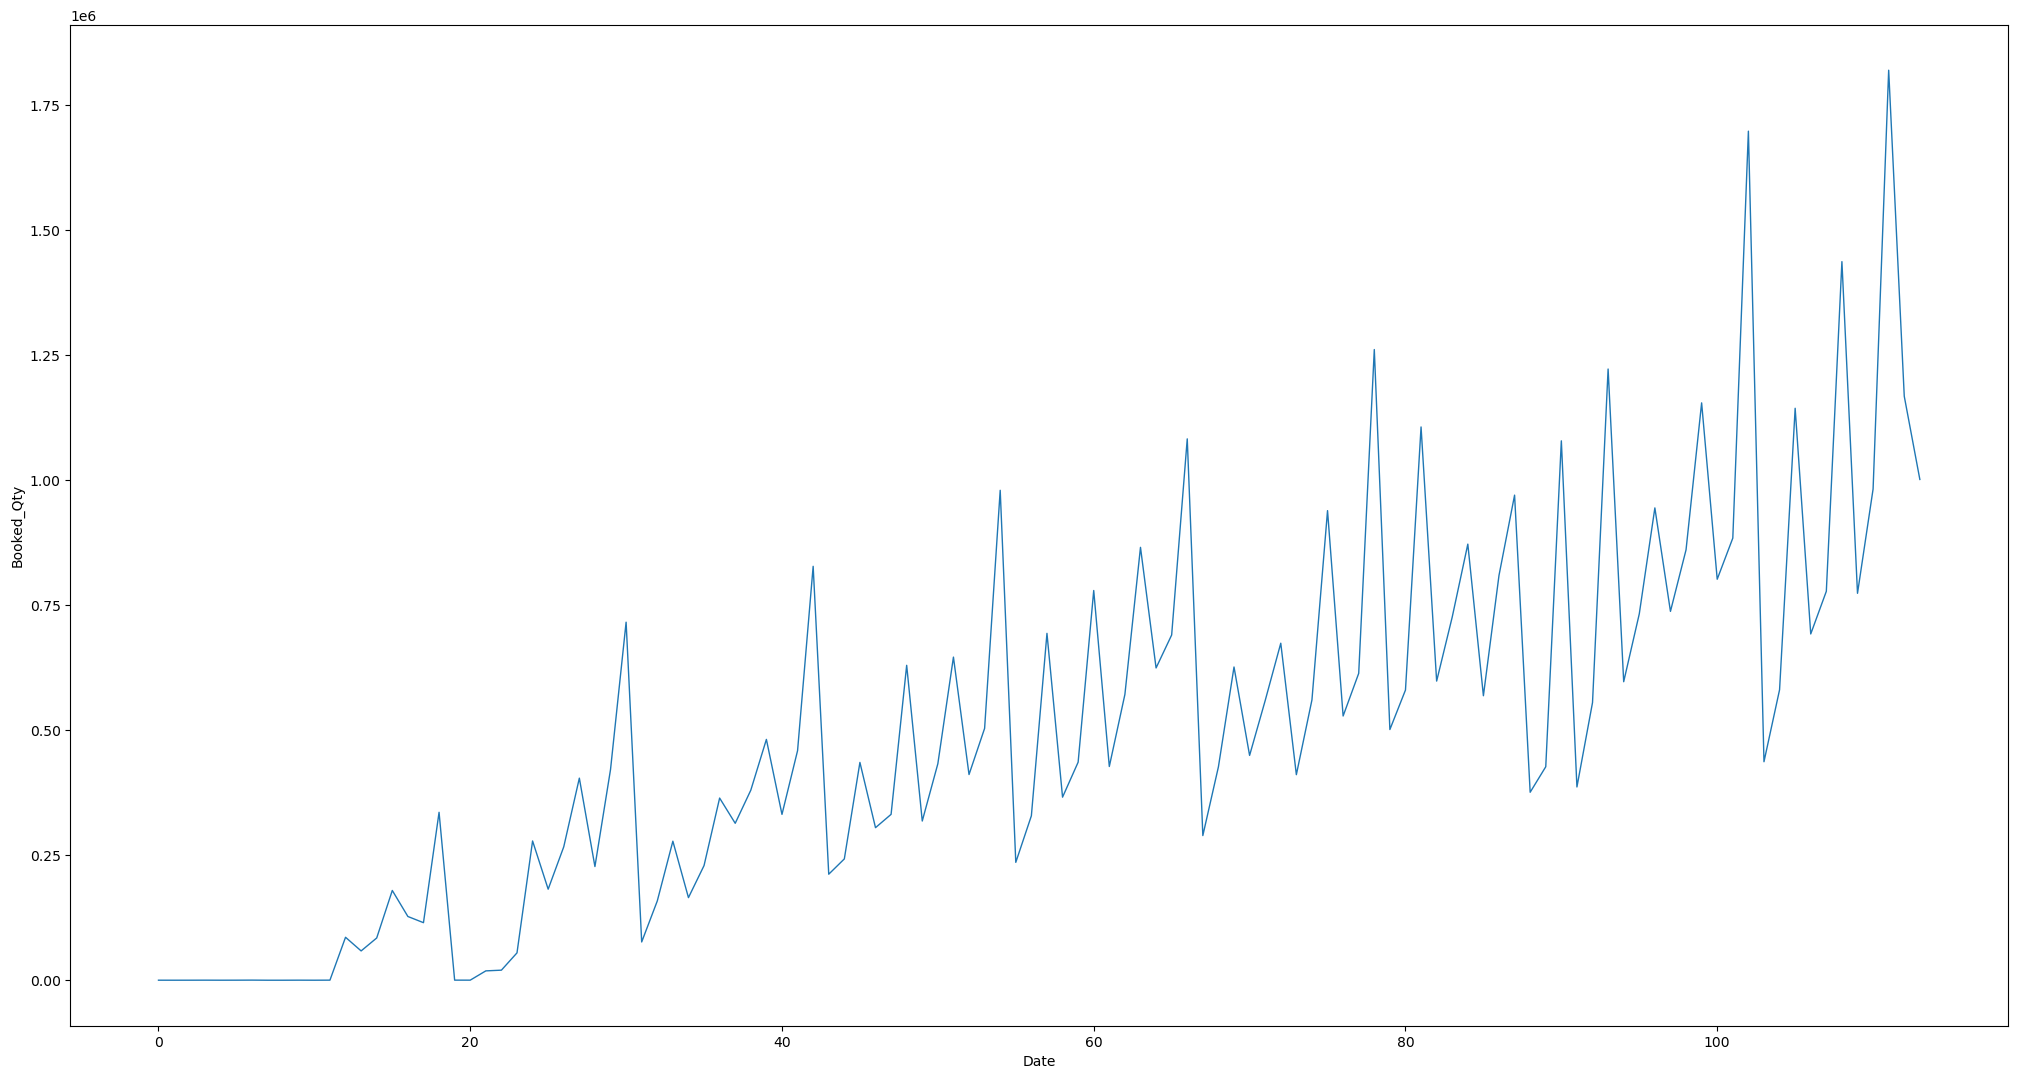

In [172]:
plt.figure(figsize=(25,13))
plt.plot(daily_sales, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Booked_Qty')
plt.show()

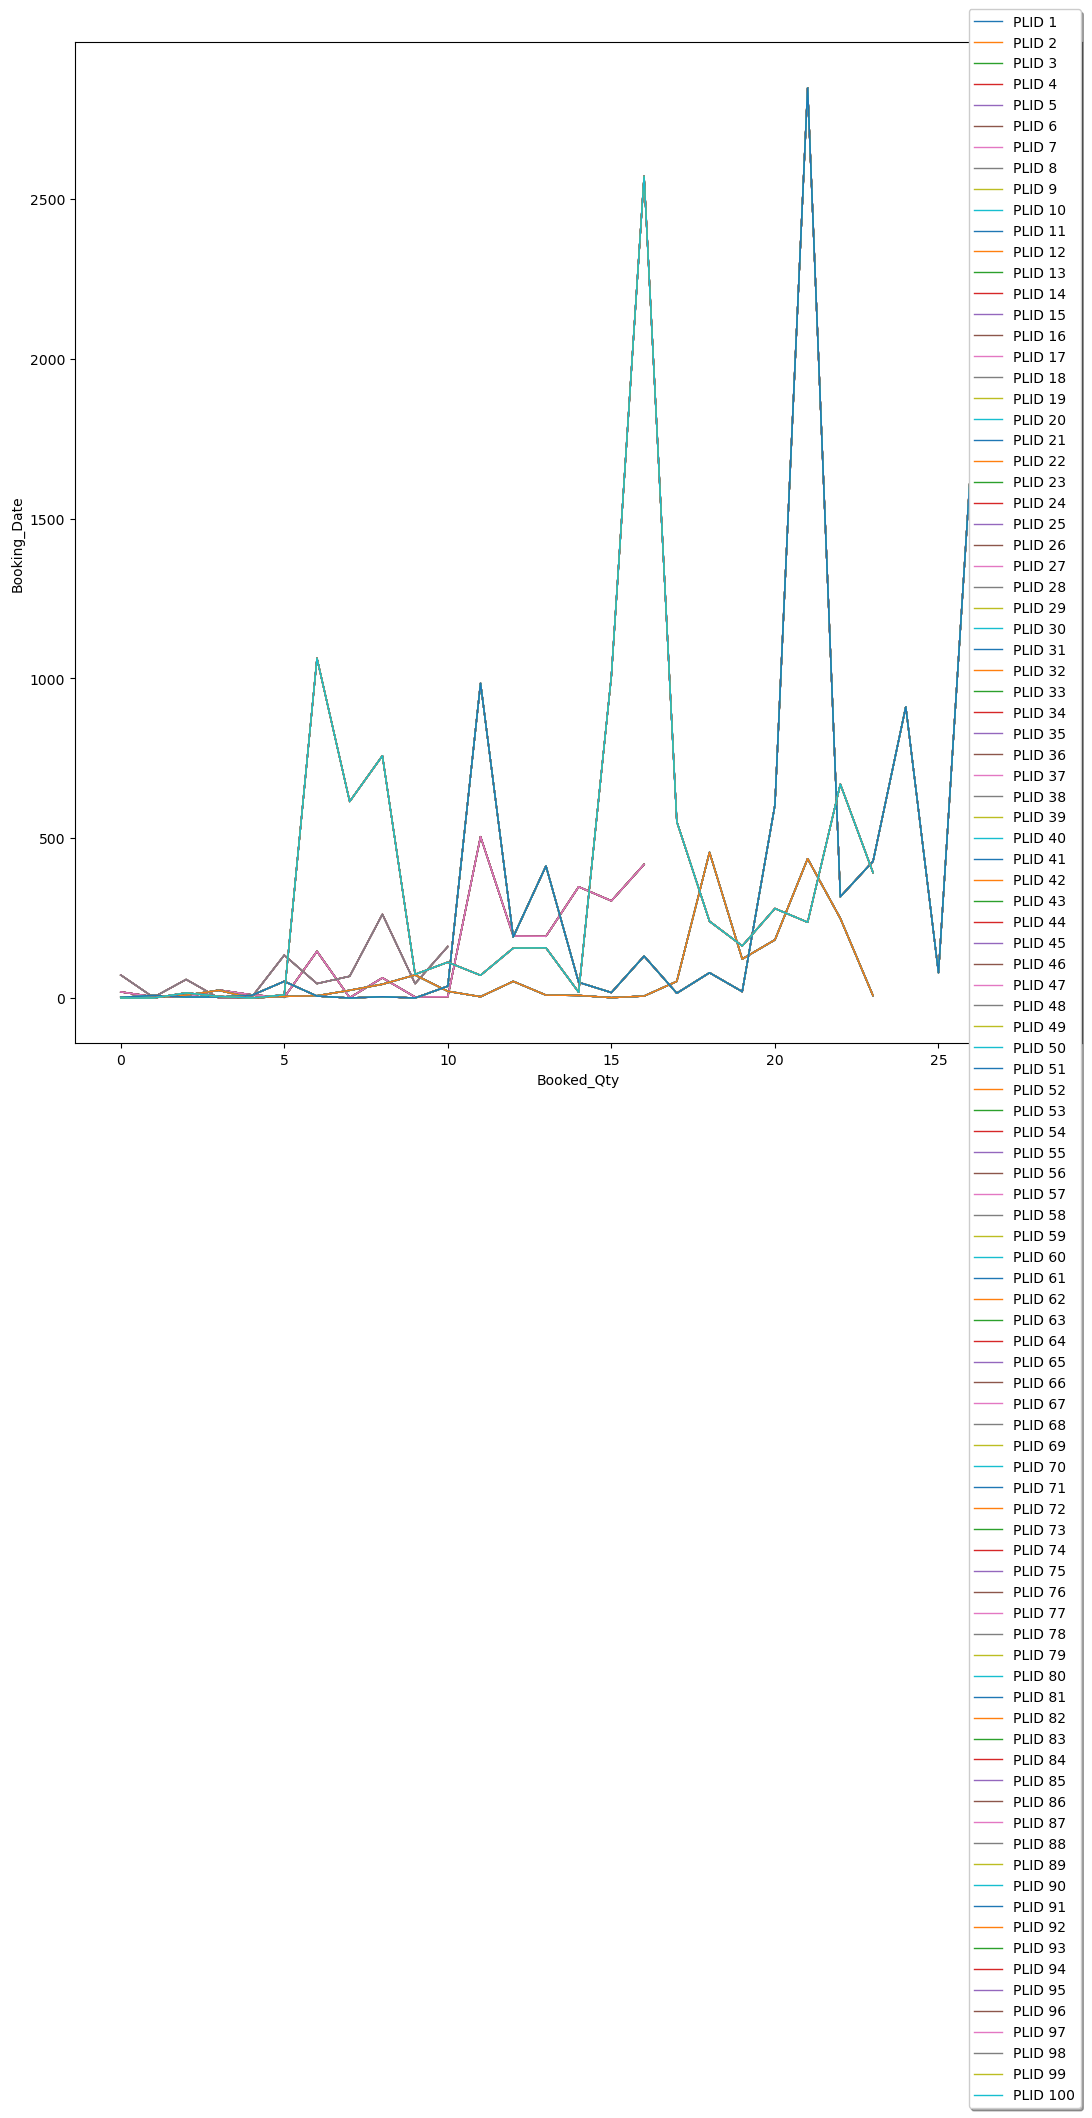

In [174]:
plt.figure(figsize=(13,13))
legend = []
for i in range(100):
    item_sales=train_data.loc[train_data['PLID'] == df['PLID'][i]]
    item_sales=item_sales.groupby('Booking_Date', as_index=False)['Booked_Qty'].sum()
    item_sales=item_sales.reset_index()['Booked_Qty']
    plt.plot(item_sales, linewidth=1)    
    legend.append(('PLID '+str(i+1)))
plt.xlabel('Booked_Qty')
plt.ylabel('Booking_Date')
plt.legend(legend, loc='upper right', ncol=1, bbox_to_anchor=[1.005, 1.04], fancybox=True, shadow=True)
plt.show()

In [ ]:
Q4 FY2021

In [175]:
train_data = train_data[(train_data['Booking_Date'] >= '2022-12-01')]
train_gp = train_data.sort_values('Booking_Date').groupby(['PLID', 'Booking_Date'], as_index=False)
train_gp = train_gp.agg({'Booked_Qty':['mean']})
train_gp.columns = ['PLID', 'Booking_Date', 'Booked_Qty']
train_gp.head()

KeyError: 'Booking_Date'

In [ ]:
x

In [ ]:
df.head()
df.tail()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load data
df = pd.read_csv('data.csv')

# Group data by PLID
grouped = df.groupby('Product Family')

# Loop through each PLID
for name, group in grouped:
    print('PLID:', name)
    # Select the 'Booked_Qty' column as the time series data
    data = group['Booked_Qty']
    # Perform ADF test on the time series data
    result = adfuller(data)
    # Print the test statistic and p-value
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    # Determine if the time series is stationary or non-stationary based on the p-value
    if result[1] > 0.05:
        print('Time series is non-stationary')
    else:
        print('Time series is stationary')
    print()


In [ ]:
import pandas as pd
from pmdarima.arima import auto_arima

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['plid', 'quarter', 'p', 'd', 'q', 'predicted_values'])

for i in range(0, 250):
    # Split data into quarters
    data = diff_business_unit(plid[i])
    quarters = [data.iloc[(k*len(data)//4):((k+1)*len(data)//4)] for k in range(4)]
   
    for j in range(4):
        train = pd.concat(quarters[:j] + quarters[j+1:])
        test = quarters[j]
       
        stepwise_model = auto_arima(train.Booked_Qty, start_p=1, start_q=1, max_p=3, max_q=3, m=25,
                                    start_P=0, seasonal=True, d=1, D=0, trace=True,
                                    error_action='ignore', suppress_warnings=True, stepwise=True)

        order_in = stepwise_model.order
        plid_val = PLID[i]
        quarter_val = j + 1

        # Make predictions on the test data
        predicted_values = stepwise_model.predict(n_periods=len(test))

        # Store the results in the DataFrame
        results_df = results_df.append({'plid': plid_val, 'quarter': quarter_val,
                                        'p': order_in[0], 'd': order_in[1], 'q': order_in[2],
                                        'predicted_values': predicted_values}, ignore_index=True)
       
        print('\n\n\n\n___________________________________________________________________________________________________________________________')
        print(color.BOLD  + '\n\n\t\t\t\t\t\t\t PLID: %s  Quarter: %d \n'% (PLID[i], quarter_val) + color.END)
        print('Least AIC ', stepwise_model.aic())
        print('Least BIC ', stepwise_model.bic())
        print(stepwise_model.summary())
        print('Predicted Values:')
        print(predicted_values)
       
# Print the results
print(results_df.head())
